

Linear Regression Project

In [19]:
from platform import python_version

print(python_version())

3.9.7


In [188]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [21]:
sns.set_style('darkgrid')

In [92]:
insurance = pd.read_csv('C:/Users/Ankita/Desktop/Projects/Kaggle/insurance.csv')

In [93]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [94]:
insurance.shape

(1338, 7)

In [95]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [96]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [97]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [98]:
insurance.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

One hot dummy encoding for sex covariate

In [99]:
#insurance = pd.get_dummies(insurance, columns=["sex"])

In [100]:
insurance.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [101]:
#insurance = pd.get_dummies(insurance, columns=["smoker"])


In [102]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [103]:
insurance.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [104]:
insurance.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

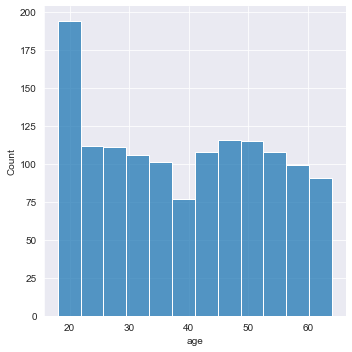

In [105]:
sns.displot(data=insurance,x='age')

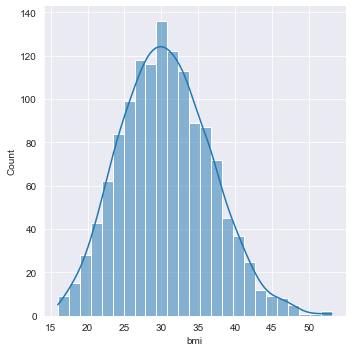

In [106]:
sns.displot(data=insurance,x='bmi', kde=True)

Text(0.5, 1.0, 'Distribution of Charges')

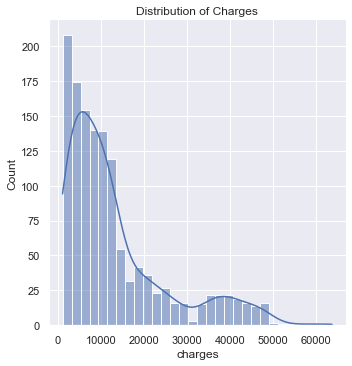

In [167]:
sns.displot(data=insurance,x='charges', kde=True)
plt.title('Distribution of Charges')

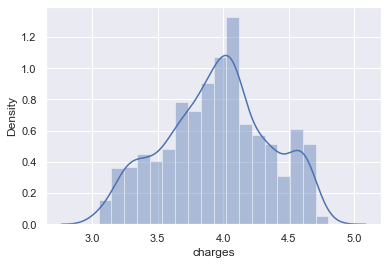

In [175]:
ax = sns.distplot(np.log10(insurance['charges']), kde = True)

<AxesSubplot:xlabel='charges', ylabel='region'>

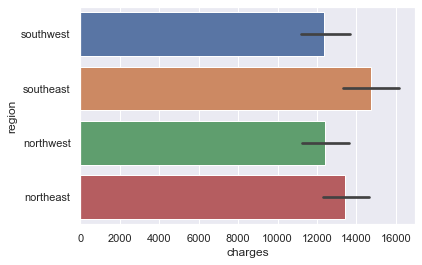

In [176]:
sns.barplot(x='charges',y='region',data=insurance)

<AxesSubplot:xlabel='region', ylabel='charges'>

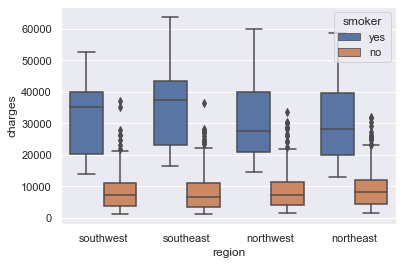

In [177]:
sns.boxplot(x='region', y='charges',data=insurance, hue='smoker')

<AxesSubplot:xlabel='region', ylabel='charges'>

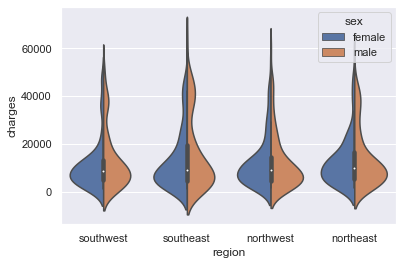

In [178]:
sns.violinplot(x='region',y='charges',data=insurance, hue='sex', split=True)

<AxesSubplot:xlabel='region', ylabel='charges'>

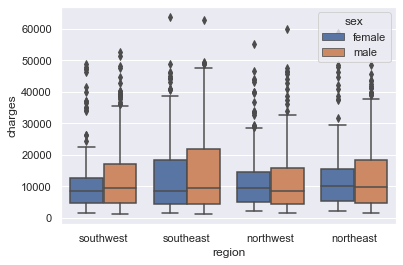

In [179]:
sns.boxplot(x='region', y='charges',data=insurance, hue='sex')

<AxesSubplot:xlabel='charges', ylabel='region'>

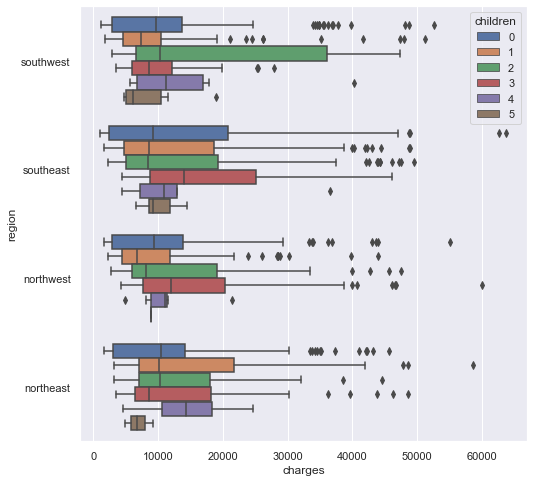

In [180]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(y='region', x='charges',data=insurance, hue='children')

<AxesSubplot:xlabel='children', ylabel='age'>

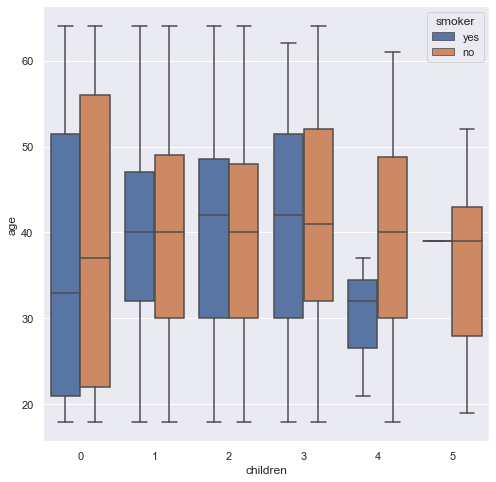

In [181]:
sns.boxplot(x='children', y='age',data=insurance, hue='smoker')

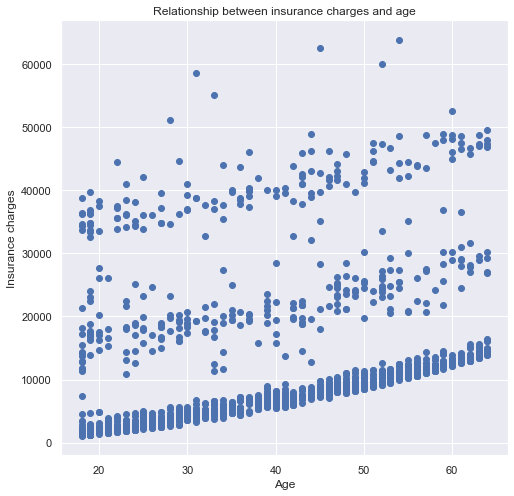

In [122]:
plt.scatter(x='age', y='charges',data=insurance)
plt.xlabel('Age',size=12)
plt.ylabel('Insurance charges',size=12)
plt.title('Relationship between insurance charges and age')
plt.show()

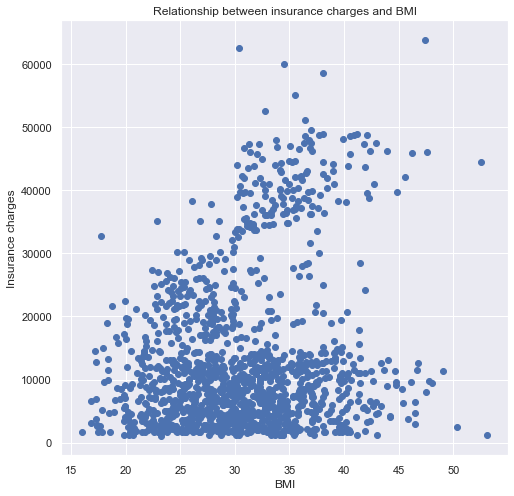

In [127]:
plt.scatter(x='bmi', y='charges',data=insurance)
plt.xlabel('BMI',size=12)
plt.ylabel('Insurance charges',size=12)
plt.title('Relationship between insurance charges and BMI')
plt.show()

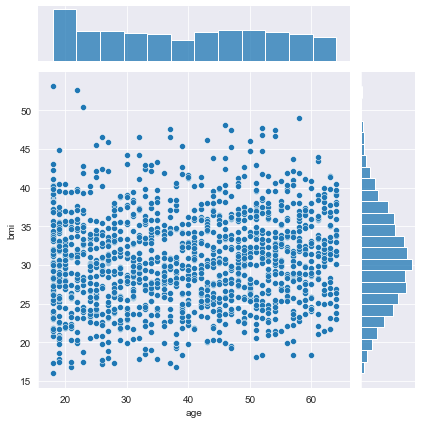

In [9]:
sns.jointplot(data=insurance, x='age',y='bmi')

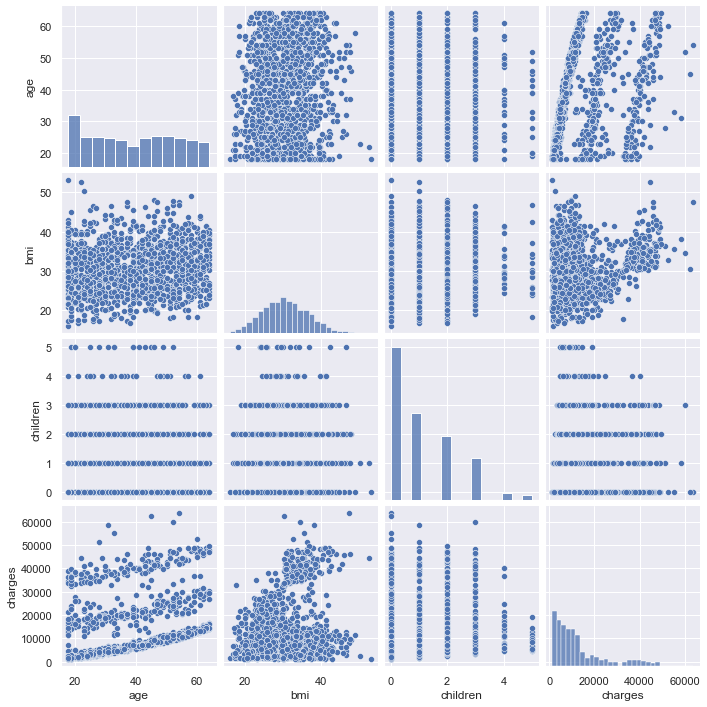

In [134]:
sns.pairplot(insurance)

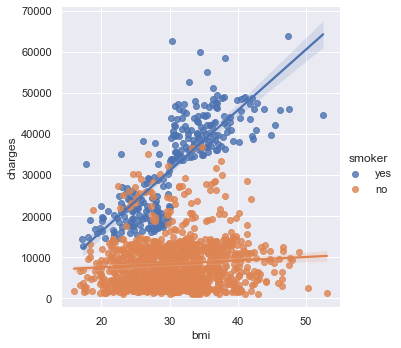

In [144]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance)

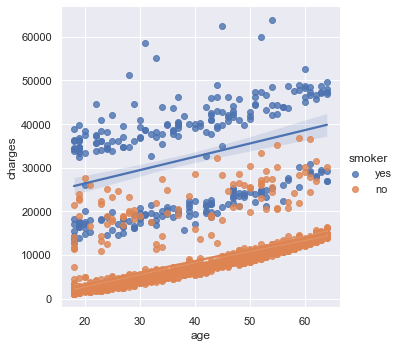

In [182]:
sns.lmplot(x="age", y="charges", hue="smoker", data=insurance)

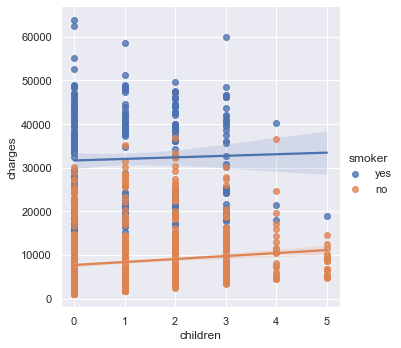

In [183]:
sns.lmplot(x="children", y="charges", hue="smoker", data=insurance)

In [187]:
##Converting objects labels into categorical
insurance[['sex', 'smoker', 'region']] = insurance[['sex', 'smoker', 'region']].astype('category')
insurance.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [191]:
label = LabelEncoder()
label.fit(insurance.sex.drop_duplicates())
insurance.sex = label.transform(insurance.sex)

In [194]:
label = LabelEncoder()
label.fit(insurance.smoker.drop_duplicates())
insurance.smoker = label.transform(insurance.smoker)

In [197]:
label = LabelEncoder()
label.fit(insurance.region.drop_duplicates())
insurance.region = label.transform(insurance.region)
insurance.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int64
charges     float64
dtype: object

<AxesSubplot:>

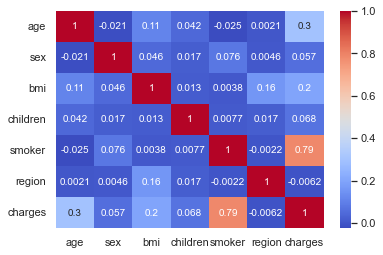

In [205]:
sns.heatmap(insurance.corr(), annot=True, cmap='coolwarm')

Training and Testing Data

In [206]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [210]:
X = insurance[['age','bmi']]

In [211]:
y = insurance['charges']

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

Training the Model

In [213]:
model = LinearRegression()

In [214]:
lm = model.fit(X_train,y_train)

In [215]:
lm.coef_

array([238.32842483, 345.03861116])

In [216]:
pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'])

,Coefficients
age,238.328425
bmi,345.038611


Predicting Test Data

In [217]:
predictions = lm.predict(X_test)

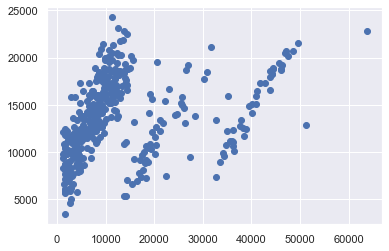

In [218]:
plt.scatter(y_test, predictions)

Evaluating the Model

In [227]:
metrics.r2_score(y_test, predictions)

0.12146846614497353

In [223]:
print('MSE:', metrics.mean_squared_error(y_test,predictions))

MSE: 123413626.90093698
